In [34]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

from scipy.optimize import minimize
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing 
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [73]:
plt.figure(figsize=(16, 9))

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

In [35]:
data = pd.read_csv('task1/ts.csv', parse_dates=True)

In [47]:
data.head()

,date,users_count
date,,
2011-07-13,2011-07-13,1.649925e+06
2011-07-14,2011-07-14,1.439200e+06
2011-07-15,2011-07-15,2.377505e+06
2011-07-16,2011-07-16,4.043366e+06
2011-07-17,2011-07-17,2.972691e+06


In [37]:
data.columns = ['date', 'users_count']

In [46]:
data.index = data.date

In [48]:
data.head()

,date,users_count
date,,
2011-07-13,2011-07-13,1.649925e+06
2011-07-14,2011-07-14,1.439200e+06
2011-07-15,2011-07-15,2.377505e+06
2011-07-16,2011-07-16,4.043366e+06
2011-07-17,2011-07-17,2.972691e+06


In [49]:
data.drop(columns=['date'], inplace=True)

In [50]:
data

,users_count
date,
2011-07-13,1.649925e+06
2011-07-14,1.439200e+06
2011-07-15,2.377505e+06
2011-07-16,4.043366e+06
2011-07-17,2.972691e+06
...,...
2018-11-27,6.236346e+06
2018-11-28,5.788579e+06
2018-11-29,5.524261e+06


<AxesSubplot:xlabel='date'>

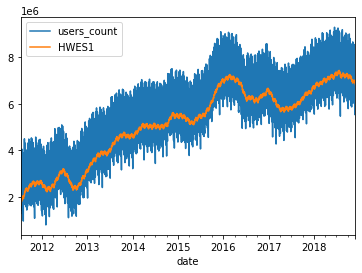

In [74]:
data.plot()

In [41]:
data['date'] = pd.to_datetime(data['date'])

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2699 entries, 0 to 2698
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         2699 non-null   datetime64[ns]
 1   users_count  2699 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 42.3 KB


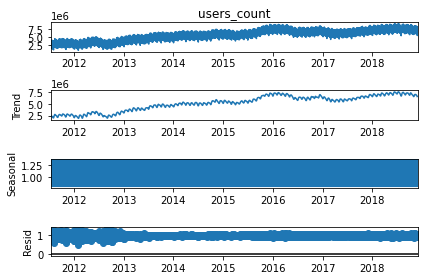

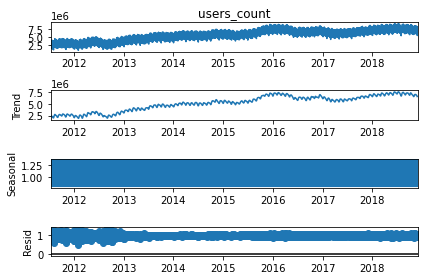

In [55]:
decompose_result = seasonal_decompose(data.users_count,model='multiplicative')
decompose_result.plot()

In [71]:
data.index.freq = 'D'

m = 12
alpha = 1 / (2*m)

/Users/fliahin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


<AxesSubplot:title={'center':'Holt Winters Single Exponential Smoothing'}, xlabel='date'>

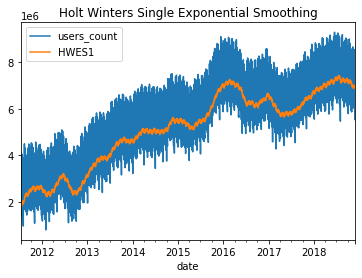

In [75]:
data['HWES1'] = SimpleExpSmoothing(data.users_count).fit(
    smoothing_level=alpha,optimized=False,use_brute=True).fittedvalues

data[['users_count','HWES1']].plot(title='Holt Winters Single Exponential Smoothing')

/Users/fliahin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/Users/fliahin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/fliahin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


<AxesSubplot:title={'center':'Holt Winters Double Exponential Smoothing: Additive and Multiplicative Trend'}, xlabel='date'>

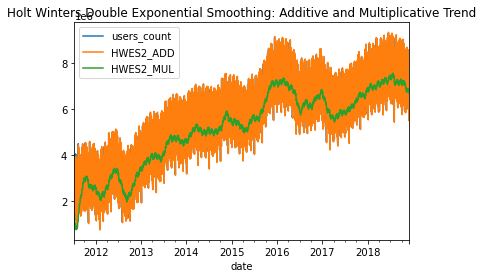

In [102]:
data['HWES2_ADD'] = ExponentialSmoothing(data['users_count'],trend='add').fit().fittedvalues

data['HWES2_MUL'] = ExponentialSmoothing(data['users_count'],trend='mul').fit().fittedvalues

data[['users_count','HWES2_ADD','HWES2_MUL']].plot(
    title='Holt Winters Double Exponential Smoothing: Additive and Multiplicative Trend')

<AxesSubplot:title={'center':'Holt Winters Double Exponential Smoothing: Additive and Multiplicative Trend'}, xlabel='date'>

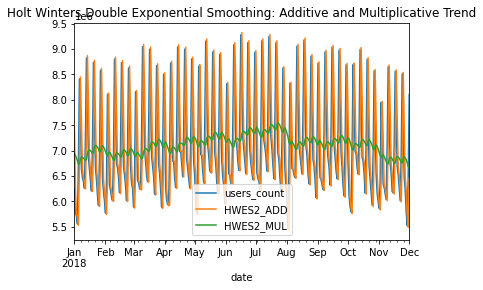

In [83]:
data.loc['2018'][['users_count','HWES2_ADD','HWES2_MUL']].plot(
    title='Holt Winters Double Exponential Smoothing: Additive and Multiplicative Trend')

<AxesSubplot:title={'center':'Holt Winters Double Exponential Smoothing: Additive and Multiplicative Trend'}, xlabel='date'>

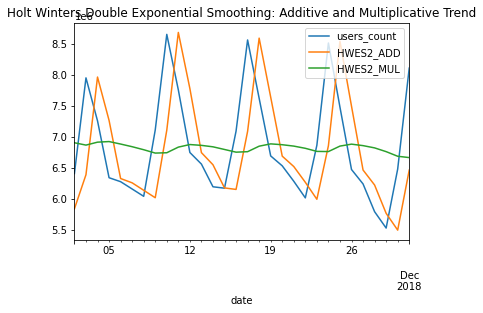

In [103]:
data[-30:][['users_count','HWES2_ADD','HWES2_MUL']].plot(
    title='Holt Winters Double Exponential Smoothing: Additive and Multiplicative Trend')

<AxesSubplot:title={'center':'Holt Winters Double Exponential Smoothing: Additive and Multiplicative Trend'}, xlabel='date'>

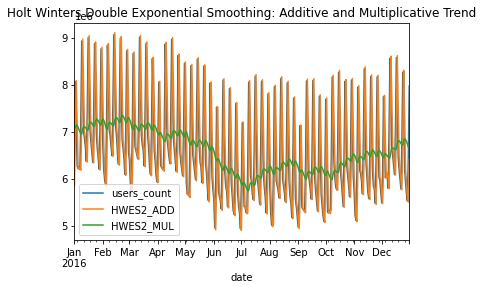

In [84]:
data.loc['2016'][['users_count','HWES2_ADD','HWES2_MUL']].plot(
    title='Holt Winters Double Exponential Smoothing: Additive and Multiplicative Trend')

/Users/fliahin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/fliahin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/Users/fliahin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


<AxesSubplot:title={'center':'Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Seasonality'}, xlabel='date'>

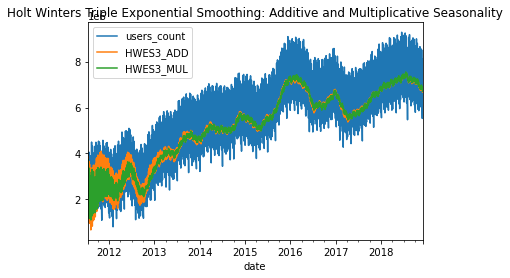

In [88]:
data['HWES3_ADD'] = ExponentialSmoothing(data['users_count'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues

data['HWES3_MUL'] = ExponentialSmoothing(data['users_count'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues

data[['users_count','HWES3_ADD','HWES3_MUL']].plot(
    title='Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Seasonality')

In [153]:
train_data = data[:-2]
test_data = data[-2:]

In [147]:
test_data

,users_count,HWES1,HWES2_ADD,HWES2_MUL,HWES3_ADD,HWES3_MUL
date,,,,,,
2018-12-01,8.105597e+06,6.822290e+06,6.460013e+06,6.661525e+06,6.676477e+06,6.709174e+06


In [139]:
ExponentialSmoothing(data['users_count'],trend='add').fit().params

/Users/fliahin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/Users/fliahin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


{'smoothing_level': 0.995,
 'smoothing_trend': 0.02369047619047619,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1649924.9388939664,
 'initial_trend': -210724.98703445843,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

/Users/fliahin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/Users/fliahin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Text(0.5, 1.0, 'Train, Test and Predicted Test using Holt Winters')

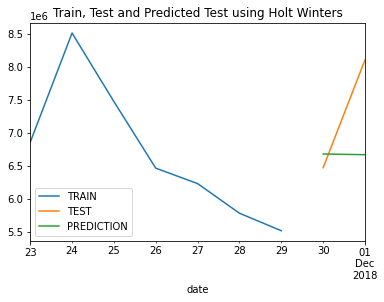

In [177]:
fitted_model = ExponentialSmoothing(train_data['users_count'],trend='mul').fit()
test_predictions = fitted_model.forecast(2)
train_data[-7:]['users_count'].plot(legend=True,label='TRAIN')
test_data['users_count'].plot(legend=True,label='TEST',figsize=(6,4))
test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted Test using Holt Winters')

Было выбрано данную модель так как её можно легко описать и обьяснить для бизнеса
Експоненциаольное с трендом достаточно хорошо как видим описывает временной ряд, но предиктит так себе

In [178]:
data = pd.read_csv('task2/df.csv')

In [184]:
data.drop(columns=['Unnamed: 0'], inplace=True)

In [185]:
data

,product_type,own_product
0,3,1
1,2,0
2,2,0
3,2,0
4,0,1
...,...,...
147,2,0
148,2,1
149,2,1
150,2,1


In [207]:
data['need'] = [0.0 for i in range(data.shape[0])]

In [208]:
data

,product_type,own_product,need
0,3,1,0.0
1,2,0,0.0
2,2,0,0.0
3,2,0,0.0
4,0,1,0.0
...,...,...,...
147,2,0,0.0
148,2,1,0.0
149,2,1,0.0
150,2,1,0.0


In [180]:
ts = pd.read_csv('task2/ts_0.csv')

In [183]:
ts.head()

,Unnamed: 0,0
0,2017-10-15,11.222379
1,2017-10-16,10.428379
2,2017-10-17,10.087085
3,2017-10-18,8.253488
4,2017-10-19,8.113196


In [214]:
for i in range(152):
    ts = pd.read_csv(f'task2/ts_{i}.csv')
    ts.columns = ['date', 'products_sold']
    ts.index = ts.date
    ts.drop(columns=['date'], inplace=True)
    prev_sold = ts.iloc[-1]
#     print(prev_sold)
    data.at[i, 'need'] = prev_sold - data.iloc[i].own_product

In [215]:
data.head()

,product_type,own_product,need
0,3,1,18.140106
1,2,0,0.000000
2,2,0,111.011799
3,2,0,111.497413
4,0,1,7.131243


Было выбрано самый простой вариант подсчёта количества товаров и самый легко интерпретируемый, то есть значения с предидущего месяца